# Biodiversity in US National Park analysis

## Project Scope

Goal of this project is to get insights of endangered species in US National Parks such as **Great Smoky Mountains National Park**, **Yosemite National Park**, **Yellowstone National Park** and **Bryce National Park**.<br>Data provided by National Parks Service contains two files with observations and detail about species and its conservation status.

## Data and libraries importing

In [686]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('paper')
sns.set(rc={"figure.figsize":(10, 10)})

In [687]:
observation = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

biodiv = pd.merge(observation, species)

In [688]:
biodiv.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [689]:
biodiv.dtypes

scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object

In [690]:
print(biodiv['park_name'].unique())
print(biodiv['category'].unique())
print(biodiv['conservation_status'].unique())
print(biodiv.groupby(['category'])['category'].count())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']
['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
category
Amphibian              328
Bird                  2364
Fish                   524
Mammal                1200
Nonvascular Plant     1332
Reptile                324
Vascular Plant       19560
Name: category, dtype: int64


In [691]:
biodiv['conservation_status'] = biodiv['conservation_status'].fillna('No intervention')

In [692]:
print(biodiv['conservation_status'].unique())

['No intervention' 'Species of Concern' 'Threatened' 'Endangered'
 'In Recovery']


In [693]:
codes = {'No intervention':1 , 'Species of Concern':3, 'Threatened':5,
       'Endangered':4, 'In Recovery':2}

In [694]:
biodiv['conservation_status_code'] = biodiv['conservation_status'].map(codes)

In [695]:
print(total_obs)

park_name
Bryce National Park                     633291
Great Smoky Mountains National Park     474863
Yellowstone National Park              1587641
Yosemite National Park                  949452
Name: observations, dtype: int64


In [696]:
biodiv2 = pd.merge(biodiv, total_obs, left_on='park_name', right_on='park_name')
biodiv2 = biodiv2.rename(columns={'observations_x' : 'observations', 'observations_y':'park_observations'})
biodiv2['is_protected'] = biodiv2['conservation_status'] != "No intervention"

In [697]:
biodiv2

,scientific_name,park_name,observations,category,common_names,conservation_status,conservation_status_code,park_observations,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No intervention,1,474863,False
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No intervention,1,474863,False
2,Prunus subcordata,Great Smoky Mountains National Park,72,Vascular Plant,Klamath Plum,No intervention,1,474863,False
3,Abutilon theophrasti,Great Smoky Mountains National Park,85,Vascular Plant,Velvetleaf,No intervention,1,474863,False
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No intervention,1,474863,False
...,...,...,...,...,...,...,...,...,...
25627,Listera borealis,Bryce National Park,80,Vascular Plant,"Northern Listera, Northern Twayblade",No intervention,1,633291,False
25628,Trifolium gracilentum var. gracilentum,Bryce National Park,50,Vascular Plant,Pinpoint Clover,No intervention,1,633291,False
25629,Ranunculus hebecarpus,Bryce National Park,108,Vascular Plant,"Delicate Buttercup, Downy-Fruit Buttercup",No intervention,1,633291,False
25630,Gulo gulo,Bryce National Park,114,Mammal,Wolverine,No intervention,1,633291,False


In [698]:
categories_by_park = biodiv2.groupby(['park_name', 'category'])['observations'].sum().unstack()

In [699]:
categories_by_park

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7542,58590,12823,28830,32992,8141,484373
Great Smoky Mountains National Park,5876,42869,9482,21056,24857,5841,364882
Yellowstone National Park,19937,144300,31459,70701,83021,20061,1218162
Yosemite National Park,11713,86612,19137,42533,49783,11779,727895


[Text(0, 0, 'Great Smoky Mountains National Park'),
 Text(1, 0, 'Yosemite National Park'),
 Text(2, 0, 'Yellowstone National Park'),
 Text(3, 0, 'Bryce National Park')]

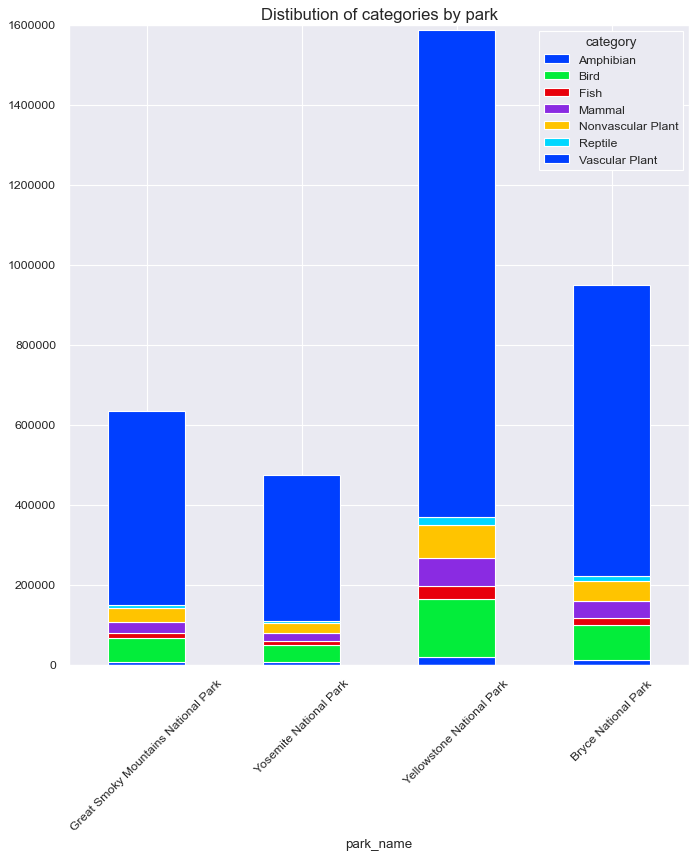

In [700]:
ax = plt.style.use('seaborn-bright')
labels = ['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Yellowstone National Park', 'Bryce National Park']
ax = categories_by_park.plot(kind='bar', stacked=True, figsize=(10,10))

ax.set_title('Distibution of categories by park', fontsize=15)
ax.set_xticklabels(labels=labels, rotation=45)

Text(0.5, 0.98, 'Protected vs. not protected by species')

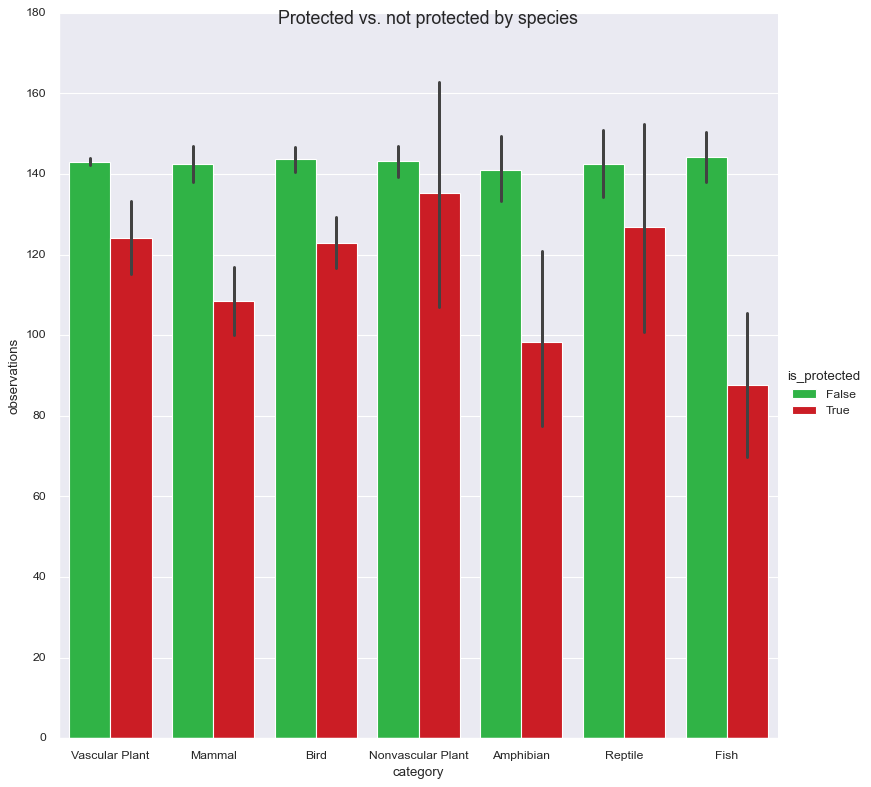

In [701]:
ax = sns.catplot(data=biodiv2, x = 'category', y='observations', hue = 'is_protected', kind='bar',  height=10, aspect=1,\
palette=[(0.10196078431372549, 0.788235294117647, 0.2196078431372549), (0.9098039215686274, 0.0, 0.043137254901960784)])
ax.fig.suptitle('Protected vs. not protected by species', fontsize=16)

In [702]:
birds_only = biodiv2[biodiv2['category'] == 'Bird'].reset_index(drop=True)

In [703]:
birds_only.shape
display(birds_only)

,scientific_name,park_name,observations,category,common_names,conservation_status,conservation_status_code,park_observations,is_protected
0,Spizella pusilla,Great Smoky Mountains National Park,72,Bird,Field Sparrow,No intervention,1,474863,False
1,Cistothorus platensis,Great Smoky Mountains National Park,65,Bird,Sedge Wren,No intervention,1,474863,False
2,Larus philadelphia,Great Smoky Mountains National Park,61,Bird,Bonaparte's Gull,No intervention,1,474863,False
3,Accipiter cooperii,Great Smoky Mountains National Park,65,Bird,Cooper's Hawk,Species of Concern,3,474863,True
4,Euphagus cyanocephalus,Great Smoky Mountains National Park,99,Bird,Brewer's Blackbird,No intervention,1,474863,False
...,...,...,...,...,...,...,...,...,...
2359,Melanerpes carolinus,Bryce National Park,105,Bird,Red-Bellied Woodpecker,No intervention,1,633291,False
2360,Empidonax virescens,Bryce National Park,96,Bird,Acadian Flycatcher,No intervention,1,633291,False
2361,Charadrius vociferus,Bryce National Park,84,Bird,Killdeer,No intervention,1,633291,False
2362,Pavo cristatus,Bryce National Park,83,Bird,Peacock,No intervention,1,633291,False


In [704]:
birds_only['scientific_name'].nunique()

488

In [705]:
birds_by_park = birds_only.groupby(['park_name'])['observations'].sum()
birds_by_park

park_name
Bryce National Park                     58590
Great Smoky Mountains National Park     42869
Yellowstone National Park              144300
Yosemite National Park                  86612
Name: observations, dtype: int64

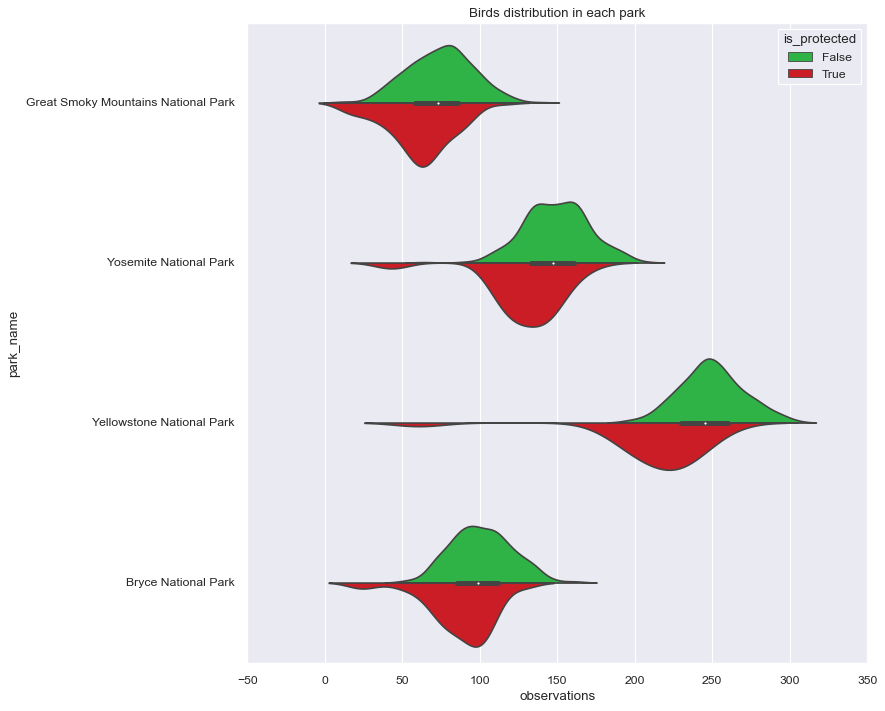

In [706]:
ax = sns.violinplot(x ='observations', y ='park_name', data = birds_only, hue='is_protected', split=True,\
palette=[(0.10196078431372549, 0.788235294117647, 0.2196078431372549), (0.9098039215686274, 0.0, 0.043137254901960784)])\
.set(title='Birds distribution in each park')

In [707]:
birds_only_status = birds_only.groupby(['conservation_status'])['observations'].sum()
display(birds_only_status)

conservation_status
Endangered               574
In Recovery             1392
No intervention       289647
Species of Concern     40758
Name: observations, dtype: int64

In [708]:
birds_status_by_park = birds_only.groupby(['park_name','conservation_status'])['observations'].sum().unstack()
birds_status_by_park['protection_pct'] = birds_status_by_park.apply(lambda x:round(((x['Endangered']+x['In Recovery']+x['Species of Concern'])/(x['Endangered']+x['In Recovery']+x['Species of Concern']+x['No intervention']))*100,2), axis=1) 

display(birds_status_by_park)

conservation_status,Endangered,In Recovery,No intervention,Species of Concern,protection_pct
park_name,,,,,
Bryce National Park,98,258,50982,7252,12.99
Great Smoky Mountains National Park,61,189,37572,5047,12.36
Yellowstone National Park,243,559,125774,17724,12.84
Yosemite National Park,172,386,75319,10735,13.04


In [709]:
protected_birds_only = birds_only[birds_only['conservation_status'] == 'Endangered'].reset_index(drop=True)
protected_birds_by_park = protected_birds_only.groupby(['park_name', 'scientific_name'])['observations'].sum().unstack()
display(protected_birds_by_park)

scientific_name,Grus americana,Gymnogyps californianus,Picoides borealis,Vermivora bachmanii
park_name,,,,
Bryce National Park,24,30,24,20
Great Smoky Mountains National Park,13,15,15,18
Yellowstone National Park,57,64,64,58
Yosemite National Park,37,47,43,45


### Conclusions
The most endangered species in US National Parks are Grus americana, Gymnogyps californianus, Picoides borealis and	Vermivora bachmanii.

#### *Grus americana* - common name *Whooping crane*<br> 
is the tallest North American bird. It is an endangered crane species. Along with the sandhill crane (Antigone canadensis), it is one of only two crane species native to North America. <br>**The whooping crane's lifespan is estimated to be 22 to 24 years in the wild.** After being pushed to the brink of extinction by unregulated hunting and loss of habitat to just 21 wild and two captive whooping cranes by 1941, conservation efforts have led to a limited recovery.**The total number of cranes in the surviving migratory population, plus three reintroduced flocks and in captivity, now exceeds 800 birds.**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Grus_americana_Sasata.jpg/640px-Grus_americana_Sasata.jpg" alt="Gymnogyps californianus" style="height: 200px; width:100px;" align='centre'/>

 #### *Gymnogyps californianus* - common name *California condor*  <br>
is a New World vulture and the largest North American land bird. It became extinct in the wild in 1987 when all remaining wild individuals were captured, but has since been reintroduced to northern Arizona and southern Utah (including the Grand Canyon area and Zion National Park), the coastal mountains of California, and northern Baja California in Mexico. Although four other fossil members are known, it is the only surviving member of the genus Gymnogyps. **The species is listed by the International Union for the Conservation of Nature as Critically Endangered.**

<img src="https://a4.pbase.com/o4/29/500829/1/61203797._MG_5277.jpg" alt="Gymnogyps californianus" style="height: 100px; width:100px;" align='centre'/>

#### *Picoides borealis* - common name *Red-cockaded Woodpecker*<br>

is a woodpecker **endemic to the southeastern United States.** Small to mid-sized species, being intermediate in size between North America's two most widespread woodpeckers (the downy and hairy woodpeckers). The red-cockaded woodpecker feeds primarily on ants, beetles, cockroaches, caterpillars, wood-boring insects, and spiders, and occasionally fruit and berries. The vast majority of foraging is on pines, with a strong preference for large trees, though they will occasionally forage on hardwoods and even on corn earworms in cornfields.

<img src="https://i.pinimg.com/474x/d6/bc/75/d6bc7532a09faf92f4e85a2876dfd519.jpg" alt="Picoides borealis" style="height: 100px; width:100px;" align='centre'/>

#### *Vermivora bachmanii* - common name *Bachman's warbler*<br>
is a small possibly extinct passerine migratory bird. This warbler was a migrant, breeding in swampy blackberry and cane thickets of the Southeastern and Midwestern United States and wintering in Cuba. There are some reports of the bird from the twenty-first century, but none are widely accepted. Some authorities accept a sighting in Louisiana, in August 1988 as confirmed, but the last uncontroversial sightings date to the 1960s.

<img src="https://assets.whatbird.com/api/image/birds_na_147/image/63878" alt="Vermivora bachmanii" style="height: 100px; width:100px;" align='centre'/>